## Production of the plot $v_a(\rho)$ and the corresponding logarithmic plot 

Produces the plot $v_a(\rho)$ and $v_a([(rho_c(L)$-$rho)/rho_c(L)])$

In [1]:
import VicsekSimulationNumba as vi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator, AutoLocator)
from scipy.optimize import curve_fit
import matplotlib
from scipy import stats


In [13]:
dataPaper = pd.read_csv("Data/vaOfRhoPaper.csv")
dataCalc = pd.read_csv("vaOfRho2calculatedWithError.csv")

xpaper = np.array(dataPaper)[:,0]
ypaper = np.array(dataPaper)[:,1]
error = np.array(dataCalc)[:,3]
xCalc = np.array(dataCalc)[:,2]
yCalc = np.array(dataCalc)[:,1]

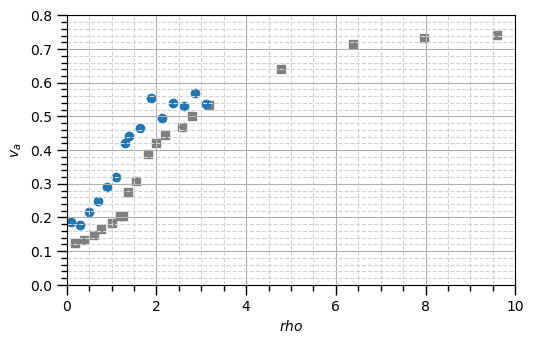

In [3]:
fig = plt.figure()
fig.set_size_inches(w=5.78851, h=3.5)
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlim([0,10])
ax1.set_ylim([0,0.8])

ax1.grid( which="both")

ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.xaxis.set_major_locator(AutoLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_major_locator(AutoLocator())

ax1.tick_params(which='both', width=1)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4, grid_linestyle="--", grid_color="lightgray")



ax1.set_xlabel('$rho$')
ax1.set_ylabel('$v_a$')

plt.scatter(xpaper,ypaper, c = 'grey',  marker = 's', s = 35)
plt.scatter(xCalc, yCalc)

In [53]:
def func(x, a, c):
    return a*(np.log(x))+c

In [104]:
popt, pcov = curve_fit(func, xCalc[4:11], yCalc[4:11])

In [65]:
perr = np.sqrt(np.diag(pcov))
aerr = perr[0]
cerr = perr[1]
perr

array([0.04764996, 0.02147448])

In [106]:
a,c = np.asarray(popt)
print(a)
print(c)

0.29062100961976445
0.3241532821732032


The value and error for the critical density

In [76]:
rhoc = np.exp(-c/a)
rhoc

0.3277902205267144

In [92]:
rhocerr = (aerr*c*rhoc)/a**2 + (cerr*rhoc)/a
rhocerr

0.08416625480734816

In [101]:
rhocerr/rhoc

0.2567686573202349

In [124]:
fig = plt.figure()
fig.set_size_inches(w=5.78851, h=3.5)
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlim([0,10])
ax1.set_ylim([0,0.8])

#ax1.grid( which="both")

#ax1.xaxis.set_minor_locator(AutoMinorLocator())
#ax1.xaxis.set_major_locator(AutoLocator())
#ax1.yaxis.set_minor_locator(AutoMinorLocator())
#ax1.yaxis.set_major_locator(AutoLocator())

#ax1.tick_params(which='both', width=1)
#ax1.tick_params(which='major', length=7)
#ax1.tick_params(which='minor', length=4, grid_linestyle="--", grid_color="lightgray")



ax1.set_xlabel(r'$\rho$')
ax1.set_ylabel('$v_a$')

plt.scatter(xpaper,ypaper, c = 'grey',  marker = 's', s = 35, label = 'Data from the paper')
plt.errorbar(xCalc, yCalc, ecolor = 'grey', fmt = 'o', yerr = error,  label = 'Calculated data')
plt.plot(np.linspace(0,6,20)[1:], func(np.linspace(0,6,20)[1:],a,c), c = 'red')
plt.legend()
plt.savefig('vaOfRhoCalc.pgf')

TypeError: func() takes 3 positional arguments but 4 were given

In [117]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [93]:
rho = (xCalc-rhoc)/rhoc
rho

array([-0.69492684, -0.08478051,  0.52536582,  1.13551215,  1.74565848,
        2.35580481,  2.96595114,  3.27102431,  4.01191628,  4.75280825,
        5.49370022,  6.2345922 ,  6.97548417,  7.71637614,  8.45726811])

In [94]:
rhoerr = error + rhocerr*abs((xCalc/rhoc - (xCalc-rhoc)/rhoc**2))
rhoerr

array([0.21194025, 0.10622428, 0.01486502, 0.12059271, 0.22684231,
       0.3314203 , 0.4383197 , 0.49245298, 0.61887145, 0.74761083,
       0.87420943, 1.00228283, 1.12965152, 1.2572925 , 1.38780754])

In [95]:
lin = stats.linregress(np.log(rho[2:]),np.log(yCalc[2:]))
lin

LinregressResult(slope=0.3919830362298618, intercept=-1.3589171847108497, rvalue=0.9672789768568888, pvalue=6.782226436534752e-08, stderr=0.031000278407598284, intercept_stderr=0.04482431786002698)

In [123]:
fig = plt.figure()
fig.set_size_inches(w=5.78851, h=4)
ax1 = fig.add_subplot(1,1,1)

#ax1.grid( which="both")

#ax1.xaxis.set_minor_locator(AutoMinorLocator())
#ax1.xaxis.set_major_locator(AutoLocator())
#ax1.yaxis.set_minor_locator(AutoMinorLocator())
#ax1.yaxis.set_major_locator(AutoLocator())

#ax1.tick_params(which='both', width=1)
#ax1.tick_params(which='major', length=7)
#ax1.tick_params(which='minor', length=4, grid_linestyle="--", grid_color="lightgray")

ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_yticks([0.2,0.3,0.4, 0.6])
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.set_xticks([0.1,0.3, 1, 3])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax1.set_xlabel(r'$[(\rho_c(L)$-$\rho)/\rho_c(L)]$')
ax1.set_ylabel('$v_a$')


#plt.scatter(rho[2:], yCalc[2:])
plt.errorbar(rho[2:], yCalc[2:], yerr = error[2:], fmt = 'o', ecolor = 'grey')
yfit = lin[0]*np.log(rho[2:])+lin[1]
plt.plot(rho[2:],np.exp(yfit), c = 'red')

plt.savefig('vaOfRhoCalcLn.pgf')